The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


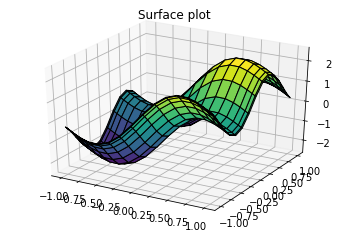

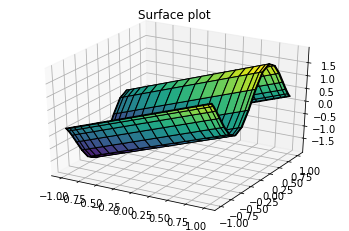

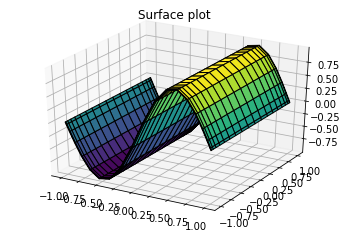

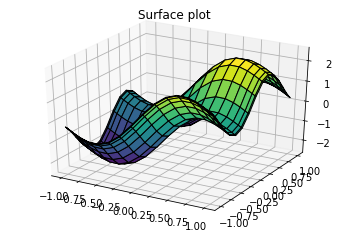

In [16]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypde.bases import *
from pypde.field import *
from pypde.plot.wireframe import plot 

#def plot(xx,yy,f):
#    fig = plt.figure()
#    ax = plt.axes(projection='3d')#

#    ax.plot_surface(xx, yy, f,cmap='viridis', edgecolor='k')
#    ax.set_title('Surface plot')
#    plt.show()
    
N,M = 20,20
shape = (N,M)
S = Field(shape,("CD","CN"))

# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = np.sin(np.pi* xx)+xx+np.sin(4*yy)#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1 +np.sin(4*y)
bc[1,:] = 1+np.sin(4*y)

#Sbc = SpectralSpaceBC(bc.shape,("CD","CD"),axis=0,value=bc)

S.v = f
S.add_bc(bc,axis=0)
S.v = S.make_homogeneous(S.v)
S.forward()
S.backward()

fhat = S.vhat
ff = S.v

plot(xx,yy,f)
plot(xx,yy,S.inhomogeneous)
plot(xx,yy,S.homogeneous)
plot(xx,yy,S.total)

#plot(xx,yy,S.xs[0].make_homogeneous(f,bc) )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


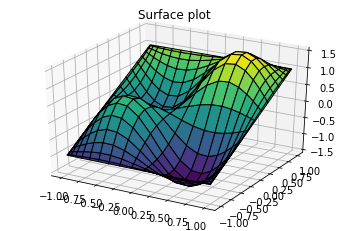

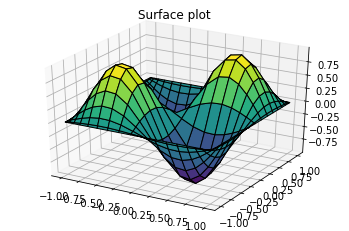

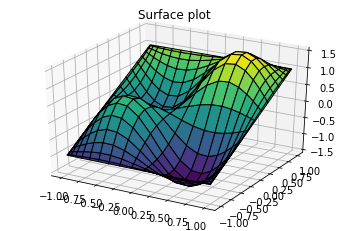

In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pypde.bases import *
from pypde.field import *
from pypde.plot.wireframe import plot 

#def plot(xx,yy,f):
#    fig = plt.figure()
#    ax = plt.axes(projection='3d')#

#    ax.plot_surface(xx, yy, f,cmap='viridis', edgecolor='k')
#    ax.set_title('Surface plot')
#    plt.show()
    
N,M = 20,20
shape = (N,M)
S = Field(shape,("CD","CD"))

# Space
x,y = S.x, S.y
xx,yy = np.meshgrid(x,y,indexing="ij")
f = (np.sin(np.pi* yy))*np.sin(np.pi*xx)+yy#+0.5*xx-0.5

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1
bc[1,:] =  1
S.v = f
S.add_bc(bc.T,axis=1)
S.v = S.make_homogeneous(S.v)
S.forward()
S.backward()

fhat = S.vhat
ff = S.v

plot(xx,yy,f)
plot(xx,yy,S.homogeneous)
plot(xx,yy,S.total)

#plot(xx,yy,S.xs[0].make_homogeneous(f,bc) )

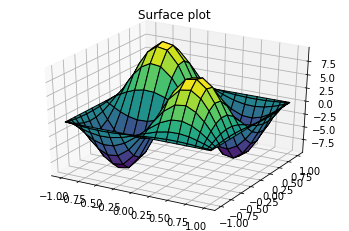

In [20]:
CH = Field(shape,("CH","CH"))

dfhat = S.derivative(S.vhat,2,axis=0)
dfhat = S.derivative(dfhat,0,axis=1)
CH.vhat = dfhat
CH.backward()

plot(xx,yy,CH.v)

In [25]:
dfhat2 = S.field_bc.derivative(S.field_bc.vhat,deriv=2,axis=0)

AssertionError: 20 2

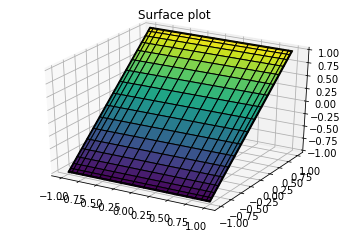

In [23]:
plot(xx,yy,S.field_bc.v)

In [26]:
S.field_bc.vhat.shape

(20, 2)

In [28]:
S.field_bc.__dict__


{'shape_physical': (20, 20),
 'ndim': 2,
 'xs': [<pypde.bases.chebyshev.ChebDirichlet at 0x7fb214571048>,
 'shape_spectral': (18, 18),
 'bases': ('CD', 'CN'),
 'axis': 0,
 '_v': array([[-2.43197505e-01, -2.79965135e-01, -4.01460835e-01,
         -6.32515934e-01, -9.85031175e-01, -1.41911138e+00,
         -1.81562003e+00, -1.99935260e+00, -1.83157751e+00,
         -1.32434327e+00, -6.75656731e-01, -1.68422487e-01,
         -6.47403625e-04, -1.84379965e-01, -5.80888625e-01,
         -1.01496882e+00, -1.36748407e+00, -1.59853917e+00,
         -1.72003487e+00, -1.75680250e+00],
        [-2.29558808e-01, -2.66326438e-01, -3.87822138e-01,
         -6.18877238e-01, -9.71392478e-01, -1.40547268e+00,
         -1.80198134e+00, -1.98571390e+00, -1.81793882e+00,
         -1.31070457e+00, -6.62018035e-01, -1.54783790e-01,
          1.29912930e-02, -1.70741269e-01, -5.67249928e-01,
         -1.00133013e+00, -1.35384537e+00, -1.58490047e+00,
         -1.70639617e+00, -1.74316380e+00],
        [-1.890

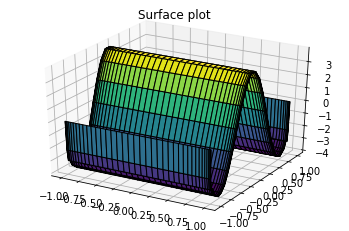

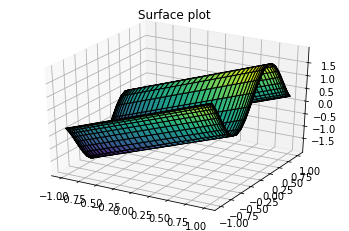

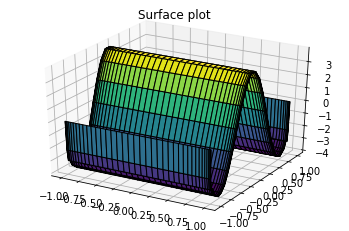

In [141]:
def derivative_field(field,deriv,out_array = None):
    assert isinstance(field,(Field,FieldBC))
    assert field.ndim == len(deriv)
    
    dvhat = field.vhat
    for axis in range(field.ndim):
        dvhat = field.derivative(dvhat,deriv[axis],axis=axis)
    
    if out_array is None:
        bases = [field.xs[0].family_id for i in range(field.ndim)]
        field_deriv = Field(field.shape_physical,tuple(bases))
        field_deriv.vhat = dvhat
        field_deriv.backward()
        return field_deriv
    else:
        out_array[:] = dvhat
        
field_bc    = FieldBC(shape,("CD","CN"),axis=0)
field_bc.bases
#bcv = field_bc.backward_fft(bc,axis=0)
#bcv.shape
#field_bc.v = bcv
field_bc.add_bc(bc)

dfhat = field_bc.vhat
dfhat = field_bc.derivative(dfhat,0,axis=0)
dfhat = field_bc.derivative(dfhat,1,axis=1)
DS = Field((N,M),("CH","CH"))
DS.vhat = dfhat
DS.backward()
plot(xx,yy,DS.v)

derivative_field(field_bc,deriv=(0,1),out_array=DS.vhat)
DS.backward()
plot(xx,yy,field_bc.v)
plot(xx,yy,DS.v)

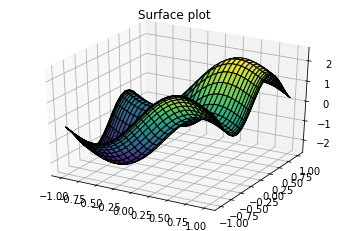

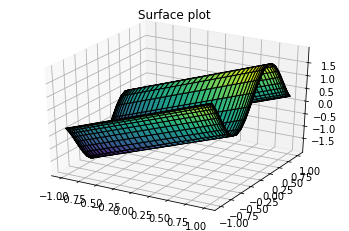

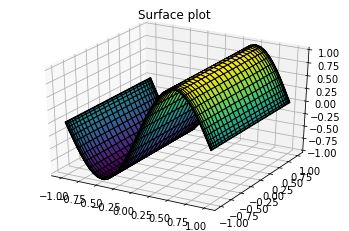

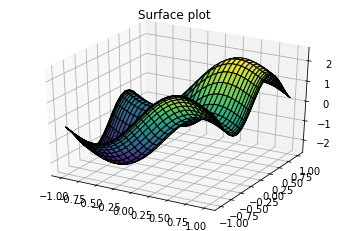

In [139]:
from pypde.field import *
N,M = 40,30
shape = (N,M)
field = Field(shape,("CD","CN"))

# Spatial info
xx,yy = np.meshgrid(field.x,field.y,indexing="ij")
f = np.sin(np.pi* xx)+xx+np.sin(4*yy)
field.v = f

# Boundary conditions
bc = np.zeros((2,M))
bc[0,:] = -1+np.sin(4*field.y)
bc[1,:] =  1+np.sin(4*field.y)
field_bc = FieldBC(shape,("CD","CN"),axis=0)
field_bc.add_bc(bc)

# Extract Homogeneous part of f
field.add_field_bc(field_bc)
field.v = field.make_homogeneous()

# Transform
field.forward()
field.backward()

# Plot
from pypde.plot.wireframe import plot 
plot(xx,yy,f)
plot(xx,yy,field.inhomogeneous)
plot(xx,yy,field.homogeneous)
plot(xx,yy,field.total)

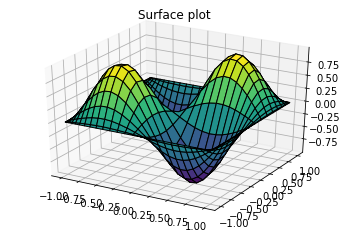

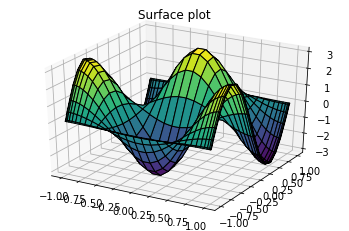

In [128]:
shape = (30,20)
    
# Set field
field = Field(shape,("CD","CN"))
xx,yy = np.meshgrid(field.x,field.y,indexing="ij")

f = np.sin(np.pi* xx)*np.sin(np.pi*yy)
field.v = f
field.forward()

# Get derivative
deriv_field = derivative_field(field,deriv=(1,0))
deriv_field.backward()

from pypde.plot.wireframe import plot
plot(xx,yy,field.v)
plot(xx,yy,deriv_field.v)

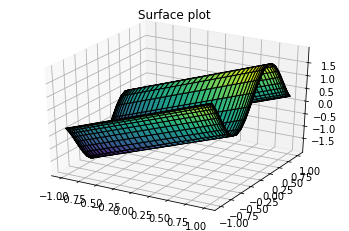

In [144]:
from pypde.field import *
N,M = 40,30
shape = (N,M)

# Field BC
field_bc = FieldBC(shape,("CD","CN"),axis=0)

bc = np.zeros((2,M))
bc[0,:] = -1+np.sin(4*field_bc.y)
bc[1,:] =  1+np.sin(4*field_bc.y)
field_bc.add_bc(bc)

from pypde.plot.wireframe import plot
plot(xx,yy,field_bc.v)